In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


['rf', 'gz', 'gy', 'gx']
{'offset_x_init': 0.0, 'offset_y_init': 0.7, 'offset_x': 0.0, 'offset_y': 0.7, 'atoms': [AxisLabel(Axis='rf', duration=0.50)]}


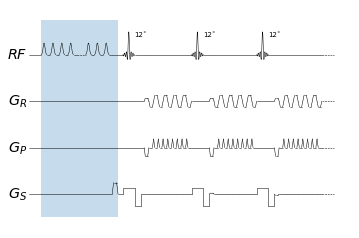

In [25]:
import copy
from seq_draw import rf_pulses, atoms, gradients, misc, overlays, SeqDiagram, seq_blocks

ax = plt.subplot(111)
ax.axes.set_frame_on(False)

# init sequence diagram
sd = SeqDiagram(ax=ax)

# inti with useful start values
sd.init_axes()
print sd.sqaxes.keys()

# internally axes are dictionarys which store elemnts in a list (key=atoms)
print sd.sqaxes['rf']

# define draw style
std_kw = {'linestyle': 'solid', 'color': 'black', 'linewidth': .5}
std_bold = copy.copy(std_kw)
std_bold['linewidth'] = 1.0
std_dashed = copy.copy(std_kw)
std_dashed['linestyle'] = 'dashed'
rf_kw = copy.copy(std_kw)
grad_kw = copy.copy(std_kw)
grad_kw_dashed = copy.copy(grad_kw)
grad_kw_dashed['linestyle'] = 'dashed'
epi_kw = copy.copy(grad_kw)
# epi_kw['alpha'] = 0.5
epi_caipi_kw = copy.copy(grad_kw)
epi_caipi_kw['color'] = 'red'
epi_caipi_kw['linestyle'] = 'dotted'
vline_kw = copy.copy(std_kw)
vline_kw['linewidth'] = .5
vline_kw['linestyle'] = 'dashed'
span_yoff = 0.925
arrow_kw={'head_width': 0.02, 'head_length': 0.05, 'color': 'black'}

# define times
start_delay = 0.75
echo_time = 5.0
nref = 1
rf_pulse_dur = 0.25
rf_intensity = 0.1
rf_int_wet = 0.15
grad_read_dur = 0.1
grad_read_int = 0.025
grad_blip_dur = 0.05
crush_dur = 0.1
crush_int = 3*grad_read_int
enc_dur = grad_read_dur
enc_int = 0.05
nav_rep = 3
epi_rep = 9

## --- Create pulse objects ---

# cest
cest_rep = 8
cest_int = 0.05
cest_rf_dur = 0.125
cest_spacing = 1.5 * cest_rf_dur
cest_spoil_dur = 0.125
cest_spoil_int = 0.05
cest_post_delay = 0.1
cest_spoiler = gradients.TrapGrad(sd, 'gz', cest_spoil_dur, cest_spoil_int, plot_kw=std_kw)
cest_rf_pulse = rf_pulses.GaussPulse(sd, 'rf', cest_rf_dur, cest_int, plot_kw=rf_kw)
cest_rf_space = misc.Line(sd, 'rf', cest_spacing - cest_rf_dur, plot_kw=std_kw)
cest_rf_element = [cest_rf_pulse, cest_rf_space]
cest_delay = misc.Line(sd, 'gz', sd.get_total_duration(cest_rf_element), plot_kw=std_dashed)
cest_delay2 = misc.Line(sd, 'gz', cest_post_delay, plot_kw=std_kw)
cest_rf =  cest_rf_element * int(cest_rep/2) + [cest_delay] + cest_rf_element * (cest_rep - (int(cest_rep/2) + 1))

## GRASE
# rf pulses
exc = rf_pulses.SincPulse(sd, 'rf', rf_pulse_dur, rf_intensity, label=u'12˚', side_lobes=6, plot_kw=rf_kw, font_kw={'size': 'x-small'}, label_coord=(rf_pulse_dur, rf_intensity))

# gradients
slab_sel = gradients.RectGrad(sd, 'gz', rf_pulse_dur, grad_read_int, plot_kw=grad_kw)
slab_sel_reph = gradients.RectGrad(sd, 'gz', rf_pulse_dur/2, -grad_read_int*2, plot_kw=grad_kw)
crush_grad = gradients.RectGrad(sd, 'gz', crush_dur, crush_int, plot_kw=grad_kw)
read_enc = gradients.TrapGrad(sd, 'gx', enc_dur, grad_read_int * 0.5, plot_kw=grad_kw)
pe1_enc = gradients.TrapGrad(sd, 'gy', enc_dur, -grad_read_int*1.5, plot_kw=grad_kw)
pe2_enc_1 = gradients.TrapGrad(sd, 'gz', enc_dur, -grad_read_int*0.0, plot_kw=grad_kw)
pe2_enc_2 = gradients.TrapGrad(sd, 'gz', enc_dur, grad_read_int*0.2, plot_kw=grad_kw)
pe2_enc_3 = gradients.TrapGrad(sd, 'gz', enc_dur, -grad_read_int*0.2, plot_kw=grad_kw)
# navigators
pc_scans = seq_blocks.get_epi_readout(sd, 'gy', nav_rep, grad_read_dur, grad_read_int, read_grad=slab_sel, plot_kw=grad_kw)

# EPI readout
epi_read = seq_blocks.get_epi_readout(sd, 'gx', epi_rep, grad_read_dur, grad_read_int, read_grad=pe1_enc, plot_kw=grad_kw)
blip = gradients.BlipGrad(sd, 'gy', grad_blip_dur, grad_read_int, plot_kw=grad_kw)
blip_grappa = gradients.BlipGrad(sd, 'gy', grad_blip_dur, grad_read_int, plot_kw=epi_kw)
blip_caipi = gradients.BlipGrad(sd, 'gy', grad_blip_dur, grad_read_int, plot_kw=epi_caipi_kw)
epi_pe1 = seq_blocks.get_epi_blips(sd, 'gy', epi_rep - 1, grad_blip_dur, grad_read_int*1.5, grad_read_dur, blip_grad=blip, blip_pattern=[1.0], plot_kw=grad_kw)
epi_pe2 = seq_blocks.get_epi_blips(sd, 'gz', epi_rep - 1, grad_blip_dur, grad_read_int*0, grad_read_dur, blip_pattern=[1.], blip_grad=blip_grappa, plot_kw=epi_kw)
epi_pe2_CAIPI = seq_blocks.get_epi_blips(sd, 'gz', epi_rep - 1, grad_blip_dur, grad_read_int, grad_read_dur, blip_pattern=[1., -1.], blip_grad=blip_caipi, plot_kw=epi_caipi_kw)

# define some time spans
delta = misc.Line(sd, 'rf', 0.5, plot_kw=std_kw)
delta_rf = misc.Line(sd, 'gy', rf_pulse_dur, plot_kw=std_kw)
delta_crush = misc.Line(sd, 'rf', crush_dur, plot_kw=std_kw)

# --- Timing ---

cest_dur = sd.get_total_duration(cest_rf) + cest_post_delay
epi_duration = sd.get_total_duration(epi_read)
echo_time = 2. * (epi_duration/2 + enc_dur)
cest_start_time = start_delay
exc_center_time = cest_start_time + rf_pulse_dur/2

## --- Draw sequence ---

## Add pulses to axes
sd.fill(tp=start_delay, plot_kw=std_kw)

# cest
sd.add_atom(sd.set_axis([cest_rf], 'rf'))
sd.fill(plot_kw=std_kw)
sd.add_atom(sd.set_axis([cest_spoiler], 'gz'))
sd.fill(plot_kw=std_kw)
sd.add_atom(sd.set_axis([cest_delay2], 'gz'))
sd.fill(plot_kw=std_kw)

# Start with excitation and navigators
sd.add_atom(sd.set_axis([exc], 'rf'))
sd.add_atom(sd.set_axis([delta_rf], 'gx'))
sd.add_atom(sd.set_axis([delta_rf], 'gy'))
sd.add_atom(sd.set_axis([slab_sel, slab_sel_reph], 'gz'))
sd.fill(axes=['rf','gx', 'gy', 'gz'], tp=start_delay + cest_dur + rf_pulse_dur/2 + epi_duration/2 , plot_kw=std_kw)
# refocusing and EPI trajectory
# sd.add_atom(sd.set_axis(refocusing_rf, 'rf'))
sd.add_atom(sd.set_axis([read_enc, epi_read], 'gx'))
sd.add_atom(sd.set_axis([pe1_enc, epi_pe1], 'gy'))
sd.add_atom(sd.set_axis([pe2_enc_1, epi_pe2], 'gz'))
sd.fill(plot_kw=std_kw)

# Start with excitation and navigators
sd.add_atom(sd.set_axis([exc], 'rf'))
sd.add_atom(sd.set_axis([delta_rf], 'gx'))
sd.add_atom(sd.set_axis([delta_rf], 'gy'))
sd.add_atom(sd.set_axis([slab_sel, slab_sel_reph], 'gz'))
sd.fill(axes=['rf','gx', 'gy', 'gz'], tp=start_delay + cest_dur + rf_pulse_dur/2 + epi_duration/2 , plot_kw=std_kw)
# refocusing and EPI trajectory
# sd.add_atom(sd.set_axis(refocusing_rf, 'rf'))
sd.add_atom(sd.set_axis([read_enc, epi_read], 'gx'))
sd.add_atom(sd.set_axis([pe1_enc, epi_pe1], 'gy'))
sd.add_atom(sd.set_axis([pe2_enc_2, epi_pe2], 'gz'))
sd.fill(plot_kw=std_kw)

# Start with excitation and navigators
sd.add_atom(sd.set_axis([exc], 'rf'))
sd.add_atom(sd.set_axis([delta_rf], 'gx'))
sd.add_atom(sd.set_axis([delta_rf], 'gy'))
sd.add_atom(sd.set_axis([slab_sel, slab_sel_reph], 'gz'))
sd.fill(axes=['rf','gx', 'gy', 'gz'], tp=start_delay + cest_dur + rf_pulse_dur/2 + epi_duration/2 , plot_kw=std_kw)
# refocusing and EPI trajectory
# sd.add_atom(sd.set_axis(refocusing_rf, 'rf'))
sd.add_atom(sd.set_axis([read_enc, epi_read], 'gx'))
sd.add_atom(sd.set_axis([pe1_enc, epi_pe1], 'gy'))
sd.add_atom(sd.set_axis([pe2_enc_3, epi_pe2], 'gz'))
sd.fill(plot_kw=std_kw)

sd.fill(plot_kw=std_kw)
sd.fill(tp=sd.get_total_duration(sd.sqaxes['rf']['atoms']) + 0.25, plot_kw=std_dashed)

## --- Add overlay elements ---

# Shaded areas
cest_area = overlays.VerticalSpan(sd, cest_start_time, cest_start_time + cest_dur + cest_spoil_dur - cest_post_delay)
cest_area.draw()

# draw
sd.draw(debug=False)



# save
fig = plt.gcf()
fig.savefig('CEST_EP3D.pdf', bbox_inches='tight')

In [4]:
# SeqDiagram shows all axes with its elements when printed
sd

Axis rf:
  0.000: AxisLabel(Axis='rf', duration=0.50)
  0.500: Line(Axis='rf', duration=0.25)
  0.750: GaussPulse(Axis='rf', duration=0.12)
  0.875: Line(Axis='rf', duration=0.06)
  0.938: GaussPulse(Axis='rf', duration=0.12)
  1.062: Line(Axis='rf', duration=0.06)
  1.125: GaussPulse(Axis='rf', duration=0.12)
  1.250: Line(Axis='rf', duration=0.06)
  1.312: GaussPulse(Axis='rf', duration=0.12)
  1.438: Line(Axis='rf', duration=0.06)
  1.500: Line(Axis='rf', duration=0.19)
  1.688: GaussPulse(Axis='rf', duration=0.12)
  1.812: Line(Axis='rf', duration=0.06)
  1.875: GaussPulse(Axis='rf', duration=0.12)
  2.000: Line(Axis='rf', duration=0.06)
  2.062: GaussPulse(Axis='rf', duration=0.12)
  2.188: Line(Axis='rf', duration=0.06)
  2.250: Line(Axis='rf', duration=0.12)
  2.375: SincPulse(Axis='rf', duration=0.25)
  2.625: Line(Axis='rf', duration=0.20)
  2.825: Line(Axis='rf', duration=1.00)
  3.825: Line(Axis='rf', duration=0.25)
Sum 4.075
Axis gz:
  0.000: AxisLabel(Axis='gz', duration=0